<a href="https://colab.research.google.com/github/KavilaViswanathan/Machine_Learning_SuperPack/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
titanic_train = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Titanic/train.csv")
titanic_test = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Titanic/test.csv")

In [ ]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


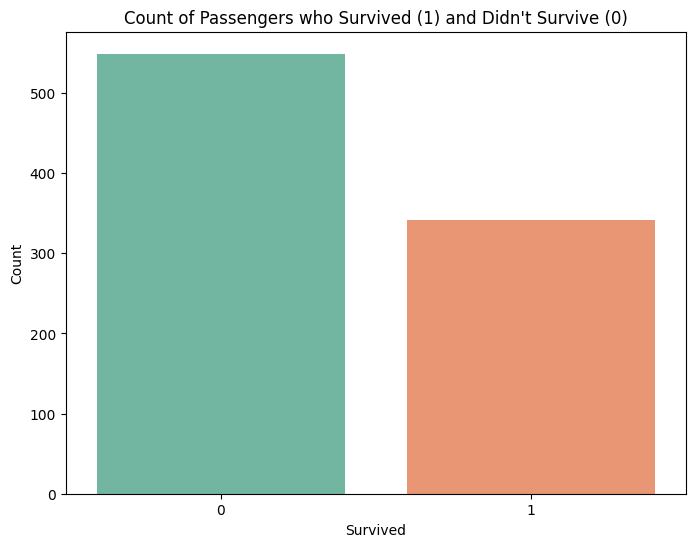

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_train, x='Survived', palette="Set2")
plt.title("Count of Passengers who Survived (1) and Didn't Survive (0)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

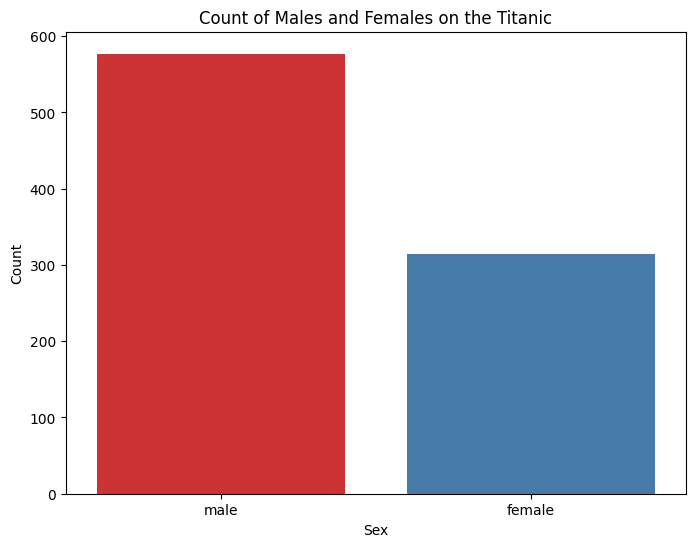

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_train, x='Sex', palette="Set1")
plt.title("Count of Males and Females on the Titanic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

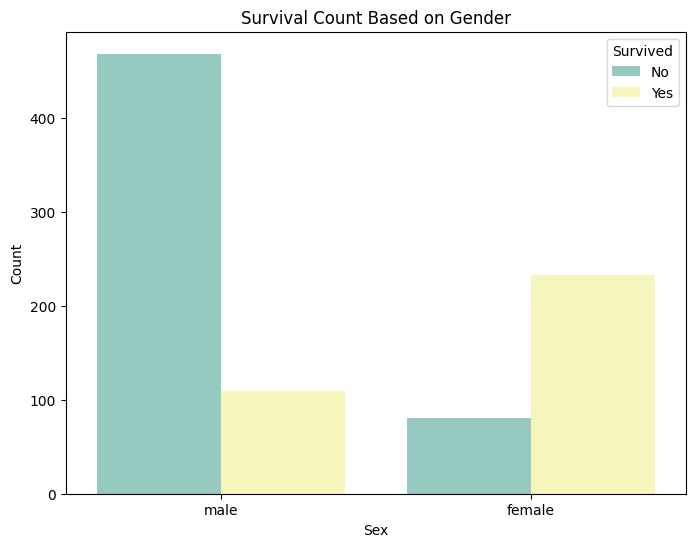

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_train, x='Sex', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
titanic_train.Age = titanic_train.Age.fillna(titanic_train.Age.mean())
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
titanic_train.drop(['Cabin'],axis=1,inplace=True)
titanic_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
titanic_train.value_counts()

Survived  Pclass  Sex     Age        SibSp  Parch  Fare    Embarked
0         3       male    29.699118  0      0      7.8958  S           13
                                                   8.0500  S           12
                                                   7.7500  Q            9
1         3       female  29.699118  0      0      7.7500  Q            7
0         2       male    29.699118  0      0      0.0000  S            6
                                                                       ..
          3       male    19.000000  0      0      6.7500  Q            1
                                                   7.6500  S            1
                                                   7.7750  S            1
                                                   8.0500  S            1
1         3       male    45.000000  0      0      8.0500  S            1
Length: 778, dtype: int64

In [ ]:
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_train.Embarked = titanic_train.Embarked.fillna("S")
titanic_train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("C")
titanic_train.Sex = titanic_train.Sex.replace(['male','female'],[0,1])
titanic_train.Embarked = titanic_train.Embarked.replace(['S','C','Q'],[0,1,2])

In [ ]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [ ]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic_test.Age = titanic_test.Age.fillna(titanic_test.Age.mean())

In [ ]:
titanic_test.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
titanic_test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
titanic_test.Embarked = titanic_test.Embarked.fillna("S")

In [ ]:
titanic_test.Fare = titanic_test.Fare.fillna(titanic_test.Fare.mean())

In [ ]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanic_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic_test.Sex = titanic_test.Sex.replace(['male','female'],[0,1])
titanic_test.Embarked = titanic_test.Embarked.replace(['S','C','Q'],[0,1,2])

In [ ]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [ ]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [ ]:
# titanic_train = pd.get_dummies(titanic_train, drop_first=True)
# titanic_train

In [ ]:
train_y = titanic_train["Survived"]
train_X = titanic_train[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X,train_y,test_size=0.8,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict1 = lrmod.predict(X_test)
accuracy_score(y_test, y_predict1)

0.8036465638148668

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict2 = naive.predict(X_test)
accuracy_score(y_test, y_predict2)

0.7840112201963534

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train, y_train)
y_pred3=svc.predict(X_test)
accuracy_score(y_test, y_pred3)

0.6493688639551192